<a href="https://colab.research.google.com/github/np03cs4a240102-lang/Concepts-and-Technologies-of-AI/blob/main/Worksheet_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('/content/drive/MyDrive/AI Workshop/bank.csv')

3.1 Warming Up Exercises - Basic Inspection and Exploration:


Problem 1 - Data Read, Write and Inspect:

In [5]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
object_cols = df.select_dtypes(include="object").columns
print(object_cols)


Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')


In [8]:
for col in object_cols:
    print(f"\n{col}:")
    print(df[col].unique())



job:
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

marital:
['married' 'single' 'divorced']

education:
['tertiary' 'secondary' 'unknown' 'primary']

default:
['no' 'yes']

housing:
['yes' 'no']

loan:
['no' 'yes']

contact:
['unknown' 'cellular' 'telephone']

month:
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']

poutcome:
['unknown' 'failure' 'other' 'success']

y:
['no' 'yes']


In [9]:
df.isnull().sum()


,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [10]:
df_numeric = df.drop(columns=object_cols)
df_numeric.head()


,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


In [11]:
df_numeric.to_csv("banknumericdata.csv", index=False)


In [12]:
bn = pd.read_csv("banknumericdata.csv")
bn.describe()


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Problem 2-Data Imputations

In [40]:
import pandas as pd

# 1. Load dataset
df = pd.read_csv("/content/drive/MyDrive/AI Workshop/medical_students_dataset.csv")

# 2. Check missing values
print("Missing values:\n", df.isnull().sum())

# 3. Fill missing values
for col in df.columns:
    if df[col].dtype == "object":      # Categorical column
        df[col] = df[col].fillna(df[col].mode()[0])
    else:                              # Numerical column
        df[col] = df[col].fillna(df[col].mean())

# 4. Handle duplicates
print("Duplicates before:", df.duplicated().sum())
df = df.drop_duplicates()
print("Duplicates after:", df.duplicated().sum())

df


Missing values:
 Student ID        20000
Age               20000
Gender            20000
Height            20000
Weight            20000
Blood Type        20000
BMI               20000
Temperature       20000
Heart Rate        20000
Blood Pressure    20000
Cholesterol       20000
Diabetes          20000
Smoking           20000
dtype: int64
Duplicates before: 12572
Duplicates after: 0


,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.000000,18.000000,Female,161.777924,72.354947,O,27.645835,98.600948,95.0,109.000000,203.0,No,No
1,2.000000,26.021561,Male,152.069157,47.630941,B,23.338869,98.714977,93.0,104.000000,163.0,No,No
2,3.000000,32.000000,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.000000,216.0,Yes,No
3,49974.042078,30.000000,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.000000,141.0,No,Yes
4,5.000000,23.000000,Female,174.947103,46.234173,O,23.338869,98.480008,95.0,114.558033,231.0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,49974.042078,24.000000,Male,176.503260,95.756997,B,30.737254,99.170685,65.0,121.000000,130.0,No,No
199996,99997.000000,29.000000,Female,163.917675,45.225194,B,16.831734,97.865785,62.0,125.000000,198.0,No,Yes
199997,99998.000000,34.000000,Female,174.947103,99.648914,B,33.189303,98.768210,60.0,90.000000,154.0,No,No
199998,99999.000000,30.000000,Female,156.446944,50.142824,A,20.486823,98.994212,61.0,106.000000,225.0,No,No


3.2 Exercises - Data Cleaning and Transformations with ”Titanic Dataset”:
Dataset Used: "titanic.csv"

Problem - 1:

In [25]:
df = pd.read_csv('/content/drive/MyDrive/AI Workshop/Titanic-Dataset.csv')

In [26]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
# Subset DataFrame
subset = df[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]

# Keep only first-class passengers
first_class = subset[subset['Pclass'] == 1]

# Calculate statistics
fare_mean = first_class['Fare'].mean()
fare_median = first_class['Fare'].median()
fare_max = first_class['Fare'].max()
fare_min = first_class['Fare'].min()

fare_mean, fare_median, fare_max, fare_min


(np.float64(84.1546875), 60.287499999999994, 512.3292, 0.0)

Problem - 2:

In [29]:
# Count null values in Age
null_age_count = first_class['Age'].isna().sum()
print("Null Age values:", null_age_count)

# Drop rows where Age is null
clean_first_class = first_class.dropna(subset=['Age'])
clean_first_class.head()


Null Age values: 30


,Name,Pclass,Sex,Age,Fare,Survived
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,71.2833,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,53.1000,1
6,"McCarthy, Mr. Timothy J",1,male,54.0,51.8625,0
11,"Bonnell, Miss. Elizabeth",1,female,58.0,26.5500,1
23,"Sloper, Mr. William Thompson",1,male,28.0,35.5000,1


Problem - 3:

In [30]:
# Make a copy
df_encoded = df.copy()

# Create one-hot encoded columns
embarked_dummies = pd.get_dummies(df_encoded['Embarked'], prefix="Embarked")

# Add new columns
df_encoded = pd.concat([df_encoded, embarked_dummies], axis=1)

# Drop the original Embarked column
df_encoded = df_encoded.drop(columns=['Embarked'])

# Show modified DataFrame
df_encoded.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,False,False,True


Problem - 4:

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


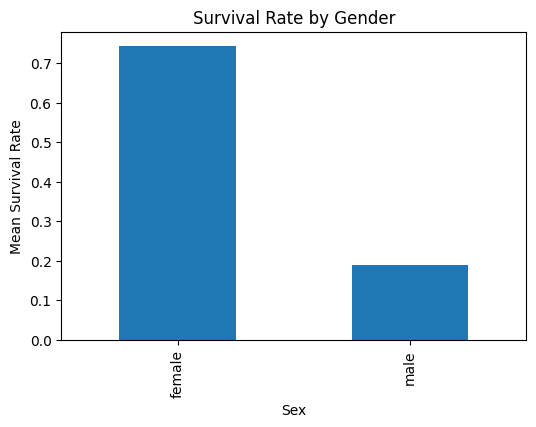

In [33]:
# Mean survival by gender
sex_survival = df.groupby("Sex")['Survived'].mean()
print(sex_survival)

# Plot
plt.figure(figsize=(6,4))
sex_survival.plot(kind='bar')
plt.xlabel("Sex")
plt.ylabel("Mean Survival Rate")
plt.title("Survival Rate by Gender")
plt.show()


Problem - 5:

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


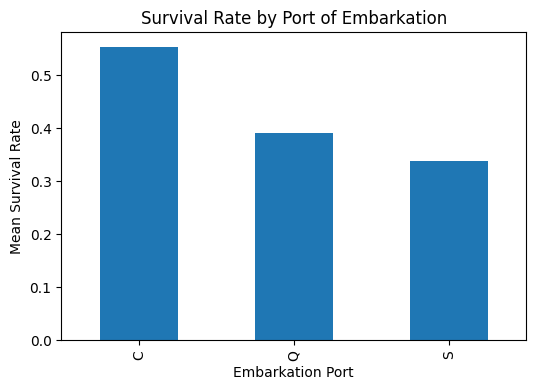

In [36]:
# Mean survival by embarkation port
embarked_survival = df.groupby("Embarked")['Survived'].mean()
print(embarked_survival)

# Plot
plt.figure(figsize=(6,4))
embarked_survival.plot(kind='bar')
plt.xlabel("Embarkation Port")
plt.ylabel("Mean Survival Rate")
plt.title("Survival Rate by Port of Embarkation")
plt.show()
